<a href="https://colab.research.google.com/github/jpedrocf/MLStudies/blob/main/WineAccuracyTestBoxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

# Imports and Dataset Load

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold


wine = load_wine()

wineds = pd.DataFrame(wine.data, columns=wine.feature_names)
wineds['target'] = wine.target


wineds.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0


# Splitting the data into training and testing sets (80% training, 20% testing)

In [38]:
array = wineds.values
X = array[:,0:13]
y = array[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=7)

# Creating folds for the cross-validation
foldsn = 10
kfold = KFold(n_splits = foldsn, shuffle = True, random_state=7)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 142
Testing set size: 36


# Data Modeling

KNN: ACC 0.68 - STD 0.09
CART: ACC 0.88 - STD 0.06
NB: ACC 0.97 - STD 0.05
SVM: ACC 0.68 - STD 0.08


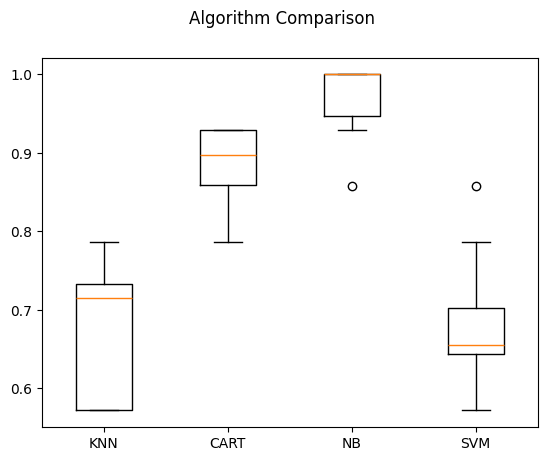

In [49]:
np.random.seed()

models = []
results = []
names = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: ACC %.2f - STD %.2f" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Model Evaluation

In [50]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0
